In [2]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [3]:
# Staked bar chart with types of mobility per canton
# Map, choose between all type + total (display more in-depth data when tooltip)

In [4]:
data = pd.read_excel('Canton_Mobility.xlsx')
data.head(3)

,Index,Name,ID,Car Availability,Car Availability Variance,Drivers Licence,Drivers Licence Variance,Transport Pass,Transport Pass Variance,Mobile,...,Public Transport Min,Public Transport Min Variance,Public Transport Min.1,Public Transport Min Variance.1,Total Min (+ wait),Total Min Variance (+ wait),Work Min (+ wait),Work Min Variane (+ wait),Leasure Min (+ wait),Leasure Min Variance (+ wait)
0,CH,Suisse,NaN,68.948206,0.460959,84.210818,0.322754,53.213423,0.432480,83.427734,...,30.126590,0.459044,7.975512,0.235807,80.244339,0.768707,15.536748,0.358496,41.646639,0.647948
1,ZH,Zurich,5988.0,61.294732,1.437631,83.917665,0.966623,64.847796,1.271827,83.426829,...,25.591567,1.255667,10.877315,0.726594,82.372698,2.277283,16.539879,1.044834,41.987806,1.916113
2,BE,Bern,5989.0,66.353783,1.315673,83.871767,0.907205,61.346607,1.200722,82.500305,...,29.203054,1.369581,8.644886,0.732553,81.274327,2.232941,15.710979,1.065111,43.461862,1.922000


In [5]:
map_df = data[['ID', 'Total KM', 'Total Min']]
map_df.info

<bound method DataFrame.info of         ID   Total KM  Total Min
0      NaN  30.014042  74.642457
1   5988.0  28.782139  75.410292
2   5989.0  31.318432  75.480775
3   5990.0  33.141977  80.399292
4   5991.0  41.535925  88.004859
5   5992.0  34.096670  74.139961
6   5993.0  33.813318  73.024257
7   5994.0  33.191880  76.606770
8   5995.0  30.105383  73.368492
9   5996.0  32.638464  81.442109
10  5997.0  37.186666  76.652102
11  5998.0  30.722213  70.562060
12  5999.0  19.744425  71.374792
13  6000.0  24.701041  72.992873
14  6001.0  24.369472  67.524471
15  6002.0  25.751796  69.526762
16  6003.0  25.751796  69.526762
17  6004.0  31.738089  71.401576
18  6005.0  33.277165  80.272965
19  6006.0  31.596676  73.259283
20  6007.0  32.093306  71.998463
21  6008.0  24.108003  67.254935
22  6009.0  32.121651  76.684435
23  6010.0  34.987135  79.758008
24  6011.0  33.101197  74.432332
25  6012.0  18.275371  71.911541
26  6013.0  32.814957  70.617050>

In [16]:
polygons = (
 'switzerland-with-regions_.geojson'
)

m = folium.Map(location=(46.947456, 7.451123), zoom_start=8, tiles="cartodb positron")
folium.Choropleth(
    geo_data=polygons,
    name='Map KM Min',
    data=map_df,
    columns=['ID', 'Total KM'],
    key_on="feature.id",
    fill_color='YlGnBu',
    threshold_scale=[15,20,25,30,35,40,45],
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Total km of daily commute',
    smooth_factor=0
).add_to(m)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
hover = folium.features.GeoJson(
    polygons,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
        tooltip=folium.features.GeoJsonTooltip(
        fields=['total km', 'total min'],
        aliases=['Total km', 'Total min'],
        title=['name'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
        localize=True
    )
).add_to(m)



m.save("map.html")
m

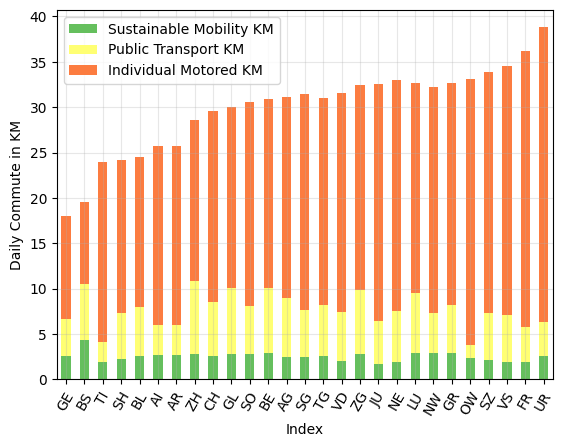

In [39]:
graph_df = data.sort_values(by=['Total KM'])
graph_df = graph_df[['Index', 'Sustainable Mobility KM', 'Public Transport KM', 'Individual Motored KM']]

colors = ['#65BF5D', '#FFFF73', '#FC7C40']

fig = graph_df.plot(x='Index', kind='bar', stacked=True,
                    color=colors, legend=['Sustainable', 'Public Transport', 'Individual Motored'])

fig.set_ylabel('Daily Commute in KM')
fig.grid(True, alpha=0.3)

fig.set_xticklabels(graph_df['Index'], rotation=60)

plt.show()